In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
def print_image(image):
    plt.imshow(image, interpolation='nearest', aspect='auto')
    plt.show()

In [3]:
def FLD(image):
    # Create default Fast Line Detector class
    fld = cv2.ximgproc.createFastLineDetector()
    # Get line vectors from the image
    lines = fld.detect(image)
    # Draw lines on the image
    line_on_image = fld.drawSegments(image, lines)
    return line_on_image

(480, 640, 3)
(480, 640)
(480, 640, 3)
0.187201797


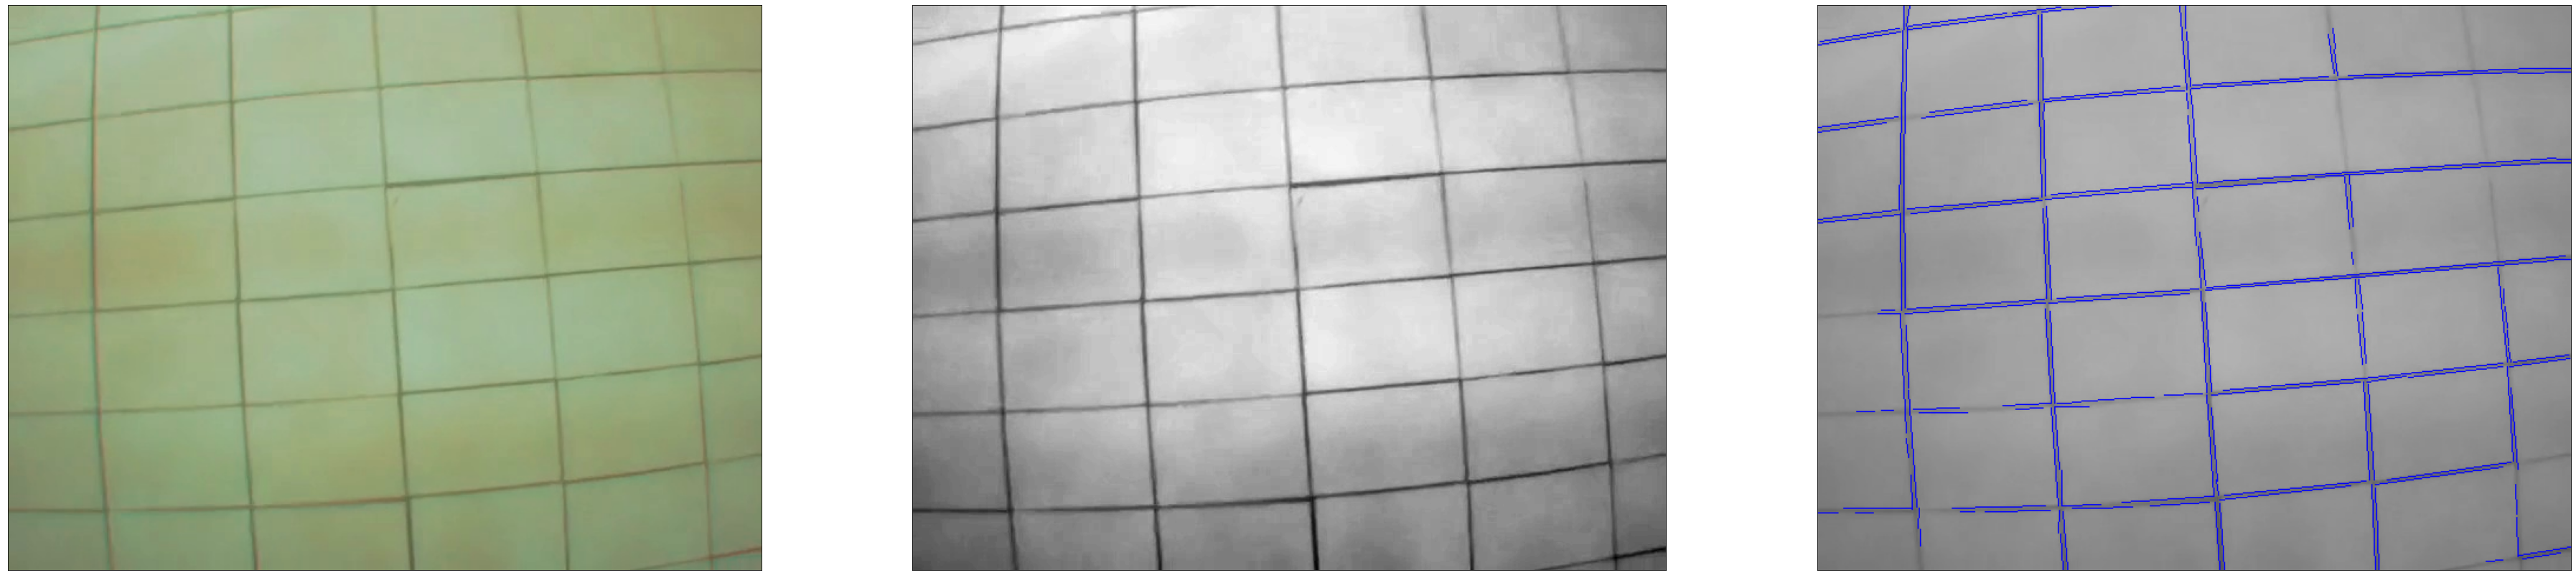

In [11]:
IMAGE_PATH = '../images/frame_0.jpg'

e1 = cv2.getTickCount()

img = cv2.imread(IMAGE_PATH)
print(img.shape)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gray.shape)
img_with_lines = FLD(gray)
print(img_with_lines.shape)

images = [img, gray, img_with_lines]

fig = plt.figure(figsize=(64,48))

for i in range(len(images)):
    fig.add_subplot(1, 3, i + 1)
    plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])

e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)

In [65]:
def rotate(image, angle):
    rows,cols = image.shape
    # cols-1 and rows-1 are the coordinate limits.
    M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return dst

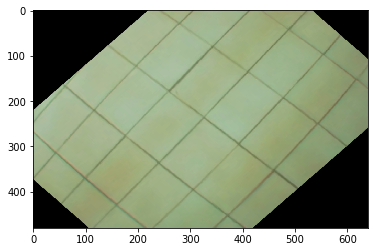

In [71]:
rotated = rotate(gray, 45)
print_image(rotated)

In [ ]:
def threshold(image):
    image = cv2.medianBlur(image,5)
    th = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    